# IMPORTING MODULES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import pylab as pl
from sklearn import svm
print("import complete")

import complete


# LOADING THE DATASET

In [2]:
cell_df = pd.read_csv('tomato_data.csv')
cell_df.head(10)


,TOMATO ID,LONGEVITY(IN DAYS),TEXTURE,COLOUR,QUALITY(5 STAR )
0,1,1,1,3,5
1,2,1,1,3,5
2,3,1,1,2,5
3,4,1,1,3,5
4,5,1,1,2,4
5,6,1,1,2,5
6,7,1,1,3,5
7,8,1,1,3,4
8,9,1,1,3,4
9,10,1,1,2,5


In [3]:
cell_df.tail(10)



,TOMATO ID,LONGEVITY(IN DAYS),TEXTURE,COLOUR,QUALITY(5 STAR )
605,606,7,3,3,3
606,607,7,3,3,3
607,608,7,3,3,3
608,609,7,3,3,3
609,610,7,3,3,3
610,611,7,3,3,3
611,612,7,3,3,3
612,613,7,3,3,3
613,614,7,3,3,3
614,615,7,3,3,3


# DIVIDING THE DATA INTO TRAIN/TEST DATA

In [4]:
feature_df=cell_df[['LONGEVITY(IN DAYS)','TEXTURE',]]
x=np.asarray(feature_df)
y=np.asarray(cell_df['QUALITY(5 STAR )'])
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.20, random_state=0)

# MODELING WITH SVM(SCIKIT-LEARN)

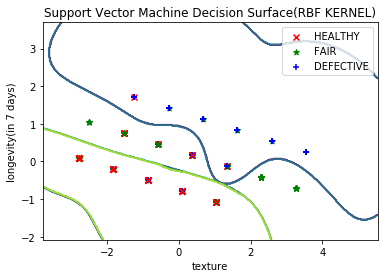

In [5]:
from sklearn import svm
pca = PCA(n_components=2).fit(x_train)
pca_2d = pca.transform(x_train)
classifier=svm.SVC(kernel='rbf',gamma='auto', C=2, random_state=0)
classifier.fit(pca_2d, y_train)
for i in range(0,pca_2d.shape[0]):
    if y_train[i]==5:
       c1=pl.scatter(pca_2d[i,0],pca_2d[i,1],  c='r', marker='x')
    elif y_train[i]==4:
       c2= pl.scatter(pca_2d[i,0], pca_2d[i,1] ,c='g', marker='*')
    elif y_train[i]==3:
       c3= pl.scatter(pca_2d[i,0], pca_2d[i,1], c='b', marker='+')
pl.legend([c1,c2,c3],['HEALTHY','FAIR','DEFECTIVE'])
x_min, x_max = pca_2d[:, 0].min() - 1,   pca_2d[:,0].max() + 2
y_min, y_max = pca_2d[:, 1].min() - 1,   pca_2d[:, 1].max() + 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),   np.arange(y_min, y_max, .02))

Z = classifier.predict(np.c_[xx.ravel(),  yy.ravel()])
Z = Z.reshape(xx.shape)
pl.contour(xx, yy,Z)

pl.title('Support Vector Machine Decision Surface(RBF KERNEL)')
pl.axis('on')
pl.ylabel("longevity(in 7 days)")
pl.xlabel("texture")

pl.show()




In [6]:
from sklearn.metrics import classification_report
classifier.fit(x_train, y_train)
Z=classifier.predict(x_test)
print(classification_report(y_test, Z))

              precision    recall  f1-score   support

           3       0.95      0.90      0.92        39
           4       0.64      0.69      0.67        26
           5       0.86      0.86      0.86        58

   micro avg       0.84      0.84      0.84       123
   macro avg       0.82      0.82      0.82       123
weighted avg       0.84      0.84      0.84       123



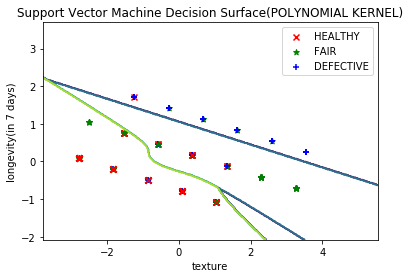

In [7]:
from sklearn import svm
pca = PCA(n_components=2).fit(x_train)
pca_2d = pca.transform(x_train)
classifier=svm.SVC(kernel='poly',gamma='auto', random_state=0)
classifier.fit(pca_2d, y_train)
for i in range(0,pca_2d.shape[0]):
    if y_train[i]==5:
       c1=pl.scatter(pca_2d[i,0],pca_2d[i,1],  c='r', marker='x')
    elif y_train[i]==4:
       c2= pl.scatter(pca_2d[i,0], pca_2d[i,1] ,c='g', marker='*')
    elif y_train[i]==3:
       c3= pl.scatter(pca_2d[i,0], pca_2d[i,1], c='b', marker='+')
pl.legend([c1,c2,c3],['HEALTHY','FAIR','DEFECTIVE'])
x_min, x_max = pca_2d[:, 0].min() - 1,   pca_2d[:,0].max() + 2
y_min, y_max = pca_2d[:, 1].min() - 1,   pca_2d[:, 1].max() + 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),   np.arange(y_min, y_max, .02))

Z = classifier.predict(np.c_[xx.ravel(),  yy.ravel()])
Z = Z.reshape(xx.shape)
pl.contour(xx, yy,Z)

pl.title('Support Vector Machine Decision Surface(POLYNOMIAL KERNEL)')
pl.axis('on')
pl.ylabel("longevity(in 7 days)")
pl.xlabel("texture")

pl.show()




# EVALUATION AND RESULTS

In [8]:
from sklearn.metrics import classification_report
classifier.fit(x_train, y_train)
Z=classifier.predict(x_test)
print(classification_report(y_test, Z))

              precision    recall  f1-score   support

           3       0.97      0.72      0.82        39
           4       0.50      0.69      0.58        26
           5       0.86      0.86      0.86        58

   micro avg       0.78      0.78      0.78       123
   macro avg       0.78      0.76      0.76       123
weighted avg       0.82      0.78      0.79       123



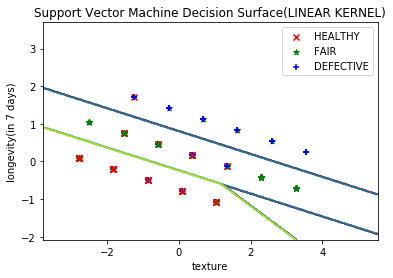

In [9]:
from sklearn import svm
pca = PCA(n_components=2).fit(x_train)
pca_2d = pca.transform(x_train)
classifier=svm.SVC(kernel='linear',gamma='auto', C=2, random_state=0)
classifier.fit(pca_2d, y_train)
for i in range(0,pca_2d.shape[0]):
    if y_train[i]==5:
       c1=pl.scatter(pca_2d[i,0],pca_2d[i,1],  c='r', marker='x')
    elif y_train[i]==4:
       c2= pl.scatter(pca_2d[i,0], pca_2d[i,1] ,c='g', marker='*')
    elif y_train[i]==3:
       c3= pl.scatter(pca_2d[i,0], pca_2d[i,1], c='b', marker='+')
pl.legend([c1,c2,c3],['HEALTHY','FAIR','DEFECTIVE'])
x_min, x_max = pca_2d[:, 0].min() - 1,   pca_2d[:,0].max() + 2
y_min, y_max = pca_2d[:, 1].min() - 1,   pca_2d[:, 1].max() + 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),   np.arange(y_min, y_max, .02))

Z = classifier.predict(np.c_[xx.ravel(),  yy.ravel()])
Z = Z.reshape(xx.shape)
pl.contour(xx, yy,Z)

pl.title('Support Vector Machine Decision Surface(LINEAR KERNEL)')
pl.axis('on')
pl.ylabel("longevity(in 7 days)")
pl.xlabel("texture")

pl.show()




In [10]:
from sklearn.metrics import classification_report
classifier.fit(x_train, y_train)
Z=classifier.predict(x_test)
print(classification_report(y_test, Z))

              precision    recall  f1-score   support

           3       0.97      0.72      0.82        39
           4       0.50      0.69      0.58        26
           5       0.86      0.86      0.86        58

   micro avg       0.78      0.78      0.78       123
   macro avg       0.78      0.76      0.76       123
weighted avg       0.82      0.78      0.79       123

